# Oliver James Tan and Chieu Le Heng

Many of us worry about climate change, or our finances, and would love to minimize the amount of vehicle fuel we pay for to travel. The most efficient way to do this, of course, is to spend zero money for zero fuel and just walk or take public transport. However, just in case of emergencies (like the virus situation we are currently in), one may want to have a private option for transport. Then, it is imperative to choose a car that is fuel efficient, or has a high value for miles traveled per gallon of fuel (`mpg`). Instead of wasting the time to search through car options, we look at dataset of 398 car brands from https://www.kaggle.com/uciml/autompg-dataset/ and use machine learning to predict `mpg` from other car attributes and use this information to classify and cluster the vehicles.

In short, in this demo we try to
1. (supervised) predict `mpg` from other attributes 
2. (supervised) classify the vehicles
3. (unsupervised) cluster the vehicles

### Attributes examined
|||
|:---:|:---|
|`mpg`| miles per gallon (fuel efficiency)|
|`cylinders`| # cylinders|
|`displacement`| engine displacement (cu. inches)|
|`horsepower`|power of engine in horsepower (1 horspower = 764W)|
|`weight`| in lbs|
|`acceleration`| time (s) taken to accelerate from 0mph to 60mph|
|`model year`|year the model was made|
|`origin`| 1 is a car made in America, 2 in Europe and 3 in Japan. Note this info is a summary of `car name`|
|`car name`| brand name|

# 1. Data cleaning
We begin by loading the data in the dataset into a pandas dataframe and clean it up. For example, we convert the values in `model year` to their actual real-world value and drop rows with `NaN` values.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency, linregress
from IPython.display import Markdown, display
np.random.seed(42)
def printmd(string):
    display(Markdown(string))
    
df = pd.read_csv('auto-mpg-cleaned.csv', na_values='?')
mask = df.columns.isin(['mpg', 'horsepower', 'weight', 'acceleration'])
df.loc[:, mask].corr()
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df['model year'] = df['model year'] + 1900

#df['origin_1'] = df['origin']==1
#df['origin_2'] = df['origin']==2
#df['origin_3'] = df['origin']==3

#df['brand'] = pd.DataFrame([i.split(' ')[0] for i in df['car name'].values])
#dict_ = dict((brand, i) for i, brand in enumerate(df['brand'].unique()))
#df['brand_id'] = pd.DataFrame(dict_[brand] for brand in df['brand'].values)

We then weed out any minor brands by checking the distribution of cars by their `brand`, and summarize the remaining data.

In [55]:
# look at brands distribution
#cnt = {}
#for brand in df['brand'].values:
#    if brand not in cnt: cnt[brand] = 0
#    cnt[brand] += 1
#print(*sorted((count, brand) for brand, count in cnt.items()), sep='\n')

In [56]:
# create new DataFrame without minor brands 
#minor_brands = [brand for brand, count in cnt.items() if count<10]
#df_major = df.loc[~df.brand.isin(minor_brands), :]

In [57]:
# summary
#df.info()

# 2. Visualisation and Correlation
We now correlate the variables: pairwise between discrete variables and pairwise between continuous variables. We then print out several graphs (histograms, scatterplots, residuals, etc.) of these variables against each other. 

                            mpg                  horsepower                 weight                acceleration       
mpg            |                           -24.489, 0.606, 0.000    -29.645, 0.693, 0.000      9.228, 0.179, 0.000    
horsepower     |  -24.489, 0.606, 0.000                              33.972, 0.747, 0.000    -18.784, 0.475, 0.000    
weight         |  -29.645, 0.693, 0.000     33.972, 0.747, 0.000                              -9.056, 0.174, 0.000    
acceleration   |    9.228, 0.179, 0.000    -18.784, 0.475, 0.000     -9.056, 0.174, 0.000                             


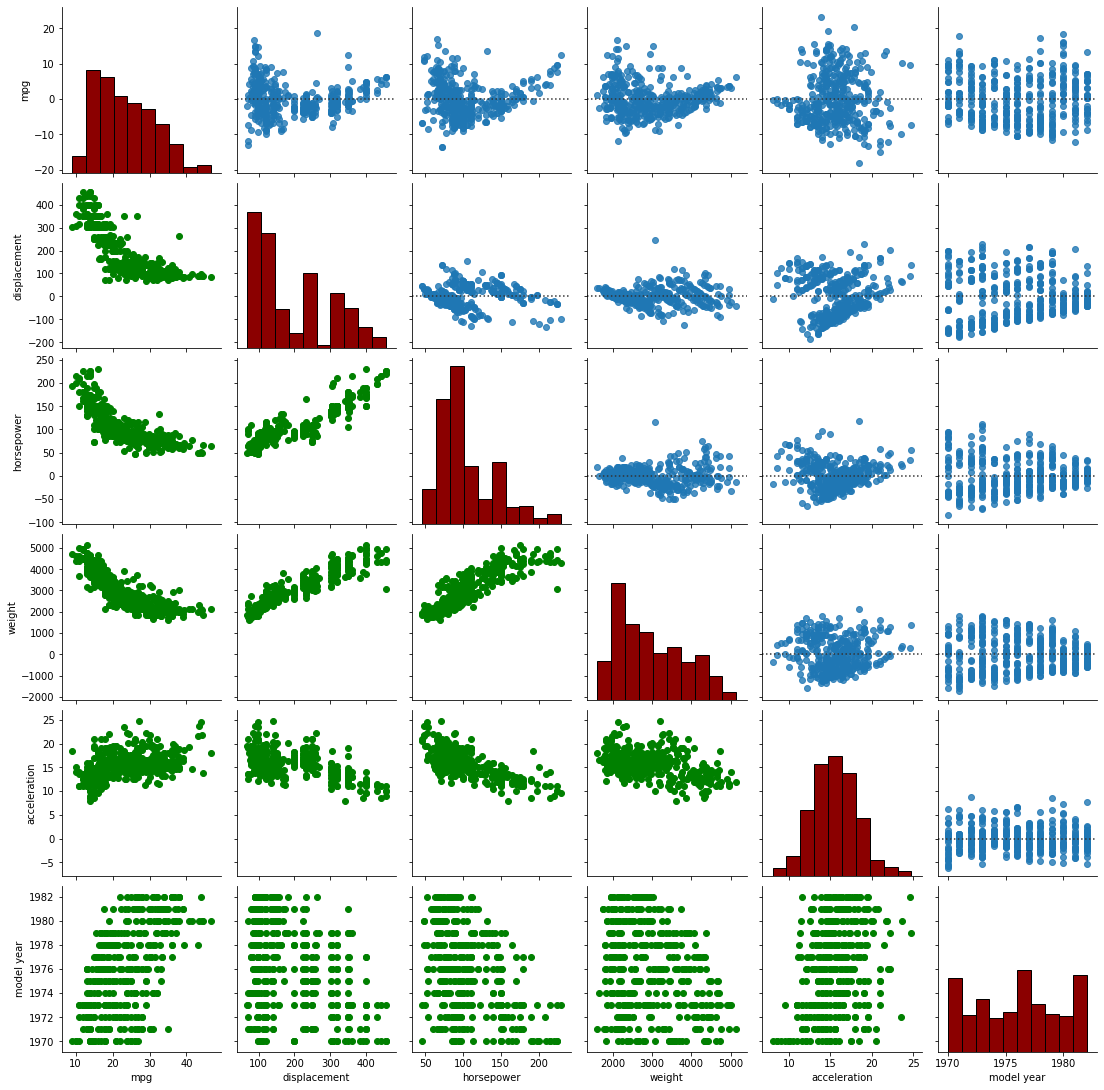

In [58]:
cols = df['mpg'], df['horsepower'], df['weight'], df['acceleration']
print(' '*17, end='')
for col1 in cols:
    print(f'{col1.name:^25}', end='')
print()

for col0 in cols:
    print(f'{col0.name:15}|', end='  ')
    for col1 in cols:
        if col0 is col1:
            print(' '*25, end='')
            continue
        regr = linregress(col0, col1)
        print('{:7.3f}, {:5.3f}, {:5.3f}'.format(regr.slope/regr.stderr, regr.rvalue**2, regr.pvalue), end='    ')
        #print(pearsonr(col0, col1), end=' ')
    print()

# HISTOGRAMS, SCATTERPLOTS AND RESIDUAL PLOTS
grid = sns.PairGrid(data= df, vars = ['mpg', 'displacement', 'horsepower',  'weight', 'acceleration', 'model year'])
grid = grid.map_upper(sns.residplot)
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', 
                     edgecolor = 'k')
grid = grid.map_lower(plt.scatter, color='green')
plt.show()

7 out of 392 data points removed
Observed
        |   4    |   6    |   8    | Total  | 
   1970 |      7 |      4 |     18 |     29 | 
   1971 |     12 |      8 |      7 |     27 | 
   1972 |     14 |      0 |     13 |     27 | 
   1973 |     11 |      8 |     20 |     39 | 
   1974 |     15 |      6 |      5 |     26 | 
   1975 |     12 |     12 |      6 |     30 | 
   1976 |     15 |     10 |      9 |     34 | 
   1977 |     14 |      5 |      8 |     27 | 
   1978 |     17 |     12 |      6 |     35 | 
   1979 |     12 |      6 |     10 |     28 | 
   1980 |     23 |      2 |      0 |     25 | 
   1981 |     20 |      7 |      1 |     28 | 
   1982 |     27 |      3 |      0 |     30 | 
Total   |    199 |     83 |    103 | 

chi^2 = 99.564
p-val = 0.000
  df  = 24.000

Expected
   |   4    |   6    |   8    | 
1970 | 14.990 |  6.252 |  7.758 | 
1971 | 13.956 |  5.821 |  7.223 | 
1972 | 13.956 |  5.821 |  7.223 | 
1973 | 20.158 |  8.408 | 10.434 | 
1974 | 13.439 |  5.605 |  6.956 | 

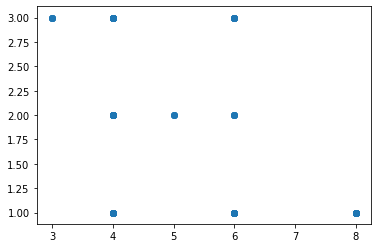

In [71]:
# CHI-SQUARE TEST
plt.scatter(df['cylinders'], df['origin'])
even_df = df[df['cylinders']%2!=1]
print(df.shape[0] - even_df.shape[0], 'out of', df.shape[0], 'data points removed')

cylinders = sorted(even_df['cylinders'].unique())
years = sorted(even_df['model year'].unique())

# header row
print('Observed')
print('        | ', end='')
for cylinder in list(cylinders) + ['Total']: print(f'{cylinder:^6} | ', end='')
print('\n' + '='*(9+9+9*len(cylinders)))

table_obs = []
for year in years:
    table_obs.append([])
    print(f'{year:7d} | ', end='')
    for cylinder in cylinders:
        table_obs[-1].append(np.sum(np.logical_and( even_df["cylinders"].values==cylinder, even_df["model year"].values==year )))
        print(f'{table_obs[-1][-1]:6d} | ', end='')
    print(f'{sum(table_obs[-1]):6d} | ', end='')
    print()

print(f'{"Total":7} | ', end='')
for i, cylinder in enumerate(cylinders):
    print(f'{sum(row[i] for row in table_obs):6d} | ', end='')
print()

# chi^2, p-val, df
results = chi2_contingency(table_obs)
print('\nchi^2 = {:.3f}\np-val = {:.3f}\n  df  = {:.3f}\n'.format(*results[:3]))
print('Expected')
print('   | ', end='')
for cylinder in cylinders: print(f'{cylinder:^6d} | ', end='')
print('\n' + '='*(4+9*len(cylinders)))
for year, row in zip(years, results[3]):
    print(f'{year:2d} | ', end='')
    for cylinder, cell in zip(cylinders, row):
        print(f'{cell:6.3f} | ', end='')
    print()

# 3. Dimensionality reduction
We then conduct Principal Components Analysis (PCA) and TSNE on the variables, to see if there are any the country of origin has any effect.

We see PCA picks up on the country of origin much better, but still, the country of origin doesn't affect the cars' traits that significantly.

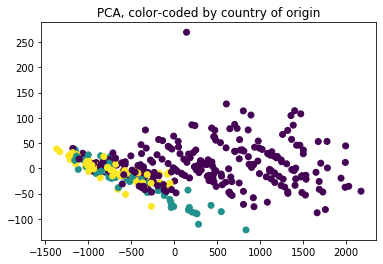

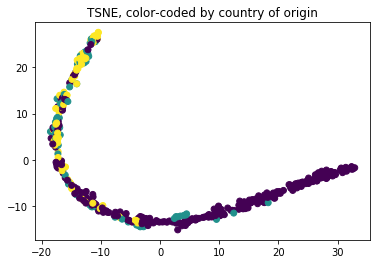

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale
from sklearn.manifold import TSNE

X, y = df[['displacement', 'horsepower', 'weight', 'acceleration', 'model year']], df['mpg']

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
plt.title("PCA, color-coded by country of origin")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['origin'])

tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)
plt.figure()
plt.title("TSNE, color-coded by country of origin")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['origin'])

# 4. Regession (Prediction of `mpg`)
Next, we use a supervised machine learning algorithm (specifically a linear regression model from sklearn) to form a model of how `mpg` and the other four variables can be related. We train and evaluate this model.

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [62]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# For illustration
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
fstring = 'mpg = {0:.3f} {1:+.3f}*displacement {1:+.3f}*horsepower {2:+.3f}*weight {3:+.3f}*acceleration {1:+.3f}*model_year'
print(fstring.format(model.intercept_, *model.coef_))
print(f'r^2 = {r2_score(y_test, prediction):.3f}')

printmd('\n**Test Results**')
print(pd.DataFrame({
    'predicted mpg': prediction,
    'actual mpg': y_test
}), '', sep='\n')

# For evaluation
printmd('\n**A less partial evaluation**')
model = LinearRegression()
print(f'r^2 = {cross_val_score(model, X, y).mean():.3f}')

mpg = -1566.924 -0.001*displacement -0.001*horsepower -0.004*weight -0.006*acceleration -0.001*model_year
r^2 = 0.832



**Test Results**

     predicted mpg  actual mpg
233      28.595648        26.0
108      24.268318        21.0
5         9.998941        15.0
221      16.765623        15.5
389      33.318330        32.0
..             ...         ...
252      25.140465        20.2
14       22.545980        24.0
104      10.176569        13.0
281      23.666640        20.2
84       13.722272        13.0

[81 rows x 2 columns]




**A less partial evaluation**

r^2 = 0.616


In [63]:
# Neural networks WITHOUT scaling
from sklearn.neural_network import MLPRegressor

# For illustration
model = MLPRegressor(random_state=0)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f'score = {model.score(X_test, y_test):.3f}')

printmd('\n**Test Results**')
print(pd.DataFrame({
    'predicted mpg': prediction,
    'actual mpg': y_test
}), '', sep='\n')

# For evaluation
printmd('\n**A less partial evaluation**')
model = MLPRegressor(random_state=0)
print(f'score = {cross_val_score(model, X, y).mean():.3f}')

score = 0.382


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



**Test Results**

     predicted mpg  actual mpg
233      26.130292        26.0
108      24.356221        21.0
5        14.003517        15.0
221      19.304843        15.5
389      24.963317        32.0
..             ...         ...
252      19.650900        20.2
14       24.055632        24.0
104       7.152044        13.0
281      19.516972        20.2
84       19.177230        13.0

[81 rows x 2 columns]




**A less partial evaluation**

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

score = -0.113


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [64]:
# Neural networks WITH scaling, comparing different hidden-layer settings
from sklearn.pipeline import Pipeline

for size in [(10,), (20,), (10,10), (20,20), (10,10,10), (20,20,20)]:
    pipeline_eval = Pipeline([
        ('scale', StandardScaler()),
        ('NN', MLPRegressor(hidden_layer_sizes=size, max_iter=2000, random_state=0)),
    ])
    # For evaluation
    print(f'{str(size):15} r^2 = {cross_val_score(pipeline_eval, X, y).mean():.3f}')

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

(10,)           r^2 = 0.760


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(20,)           r^2 = 0.786
(10, 10)        r^2 = 0.743
(20, 20)        r^2 = 0.755
(10, 10, 10)    r^2 = 0.769
(20, 20, 20)    r^2 = 0.751


The best r<sup>2</sup> score is 0.786.
Neural networks of (20,) predict the `origin` best. Scaling improves results (from -0.113 to 0.786) as expected.

# 5. Classification (of `origin`)
Finally, we train and evaluate an MLPClassifier to classify the `origin` of vehicles using `mpg` and the other 4 variables, along with `model year`.

In [65]:
X, y = df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']], df['origin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [66]:
# Neural networks WITHOUT scaling
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# For illustration
model = MLPClassifier(hidden_layer_sizes=(10,), random_state=0)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f'score = {model.score(X_test, y_test):.3f}')

printmd('\n**Test Results**')
print(pd.DataFrame({
    'predicted origin': prediction,
    'actual origin': y_test
}), '', sep='\n')

# For evaluation
printmd('\n**A less partial evaluation**')
model = MLPClassifier(hidden_layer_sizes=(10,), random_state=0)
print(f'score = {cross_val_score(model, X, y).mean():.3f}')

score = 0.694


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



**Test Results**

     predicted origin  actual origin
276                 2              2
244                 2              3
84                  1              1
56                  1              3
33                  1              1
..                ...            ...
148                 1              3
297                 2              2
135                 1              1
75                  2              2
196                 3              3

[98 rows x 2 columns]




**A less partial evaluation**

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

score = 0.638


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [67]:
# Neural networks WITH scaling, comparing different hidden-layer settings
for size in [(10,), (20,), (10,10), (20,20), (10,10,10), (20,20,20)]:
    pipeline_eval = Pipeline([
        ('scale', StandardScaler()),
        ('NN', MLPClassifier(hidden_layer_sizes=size, max_iter=2000, random_state=0)),
    ])
    # For evaluation
    print(f'{str(size):15} r^2 = {cross_val_score(pipeline_eval, X, y).mean():.3f}')

(10,)           r^2 = 0.737
(20,)           r^2 = 0.730


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(10, 10)        r^2 = 0.704


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

(20, 20)        r^2 = 0.760


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(10, 10, 10)    r^2 = 0.637
(20, 20, 20)    r^2 = 0.732


The best r^2 score is 0.760.
Neural networks of (10,) and (20, 20) predict the `origin` best. Scaling improves results (from 0.638 to 0.760) as expected.

# 7. Conclusions
Many of the features are highly correlated.
Scaling before using neural networks improves performance, from -0.113 to 0.768 for regression and from 0.638 to 0.760 for classification.